# The workbook
A workbook for recording the steps i took

### Installing required libraries

In [9]:
%pip install matplotlib pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
#importing the necessary libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import pandas as pd
import seaborn as sns

### Importing the data

In [11]:
# reading file and putting the index to date
df = pd.read_csv("./fcc-forum-pageviews.csv",parse_dates=["date"])
df.set_index('date', inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### Cleaning the data


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [12]:
#finding the filtering out
lower_threshold = df['value'].quantile(0.025)
higher_threshold = df['value'].quantile(0.975)
print("initial shape :" , df.shape)
df = df[(df["value"] >= lower_threshold) & (df["value"] <= higher_threshold)]
print("final shape :", df.shape)
df.head()

initial shape : (1304, 1)
final shape : (1238, 1)


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


 draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


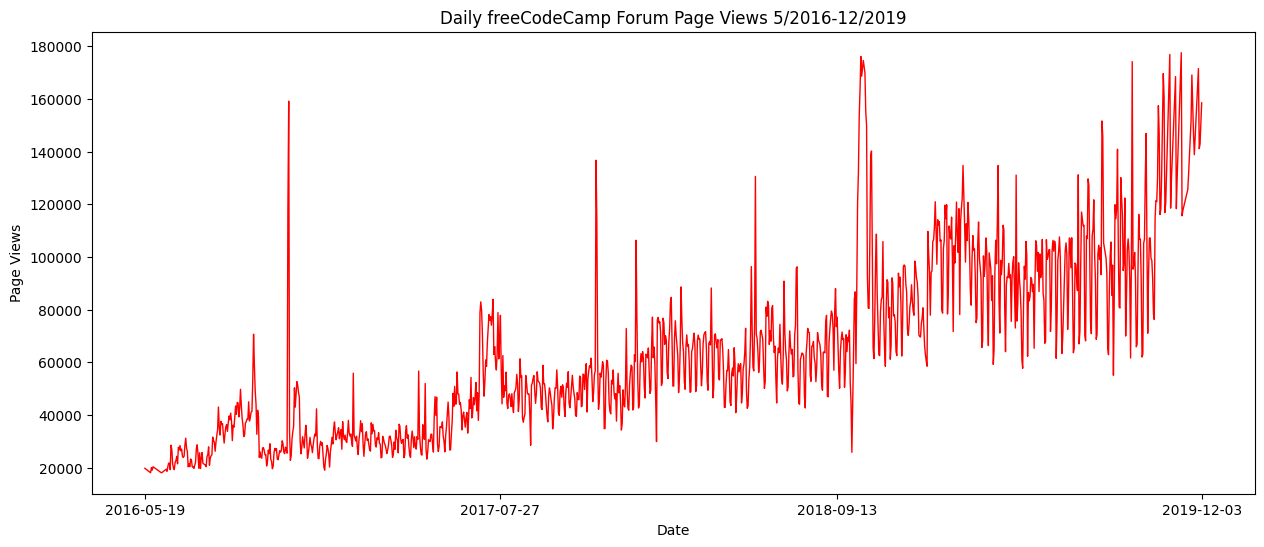

In [13]:
def draw_line_plot():
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df['value'], color='red', linewidth=1)
    
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel('Page Views')
    
    # Select specific dates to display on the x-axis
    selected_dates = df.index[[0, len(df) // 3, 2 * len(df) // 3, -1]]
    plt.xticks(selected_dates)  # Set these dates as ticks on the x-axis

    # Format dates to make them more readable
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.show()

draw_line_plot()

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [14]:
df["year"]=df.index.year
df["months"] = df.index.strftime('%B')
#grouping to select the mean of the month views and all
df_grouped = df.groupby( ["year","months"])['value'].mean().reset_index()
df_grouped.head()


,year,months,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000


Text(0, 0.5, 'Average Value')

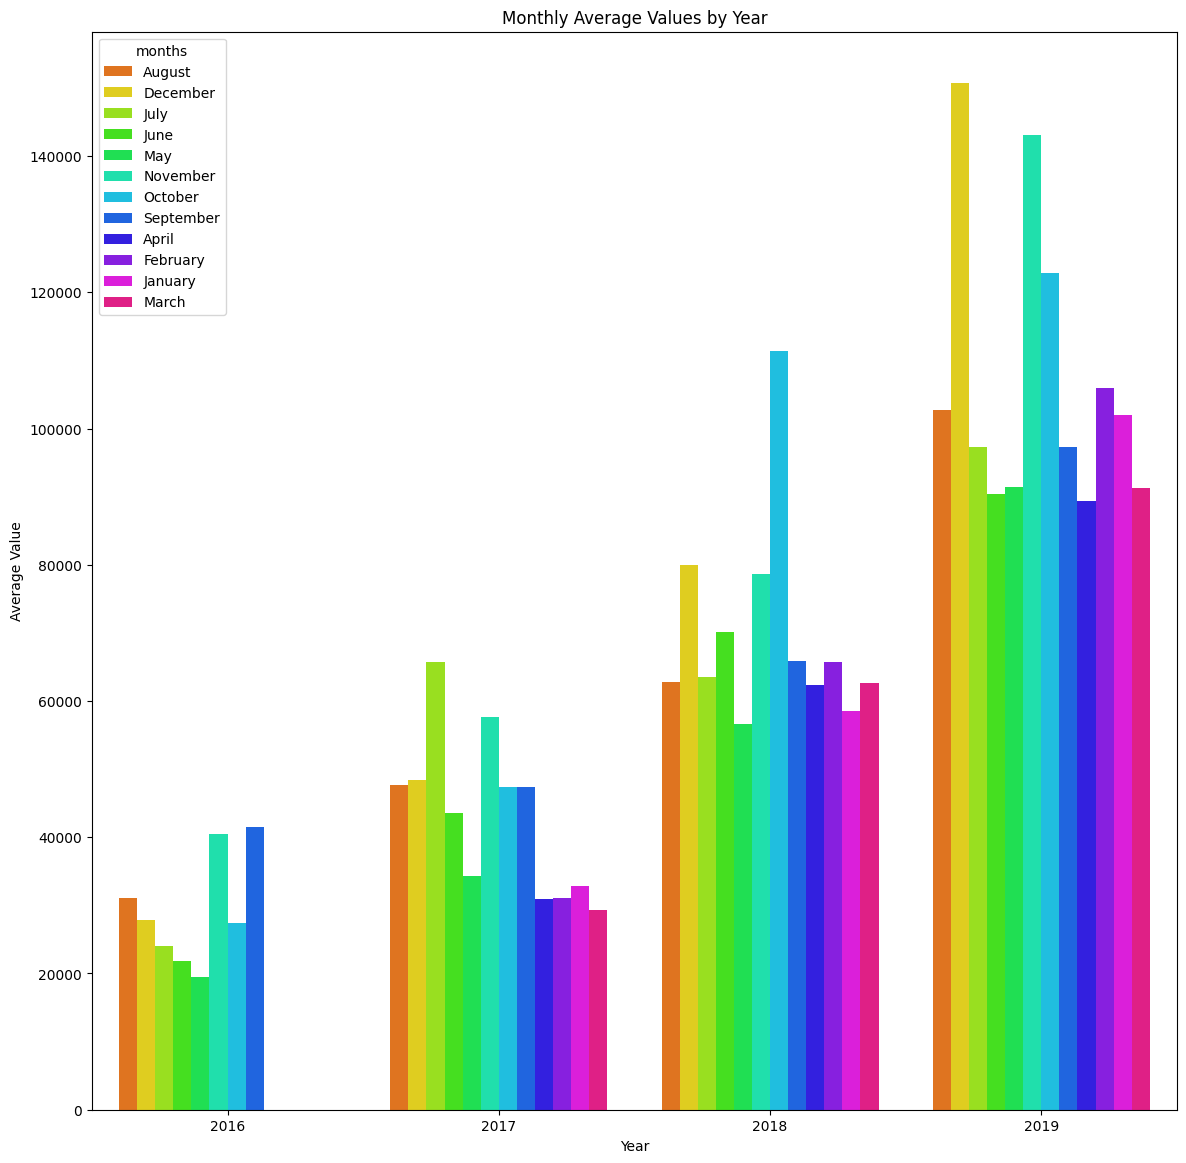

In [15]:
month_palette = sns.color_palette("hsv", 12)  

# Create a bar plot
plt.figure(figsize=(14, 14))
sns.barplot(
    data=df_grouped,
    x='year',
    y='value',
    hue='months',
    palette=month_palette
)

# Set plot labels and title
plt.title('Monthly Average Values by Year')
plt.xlabel('Year')
plt.ylabel('Average Value')

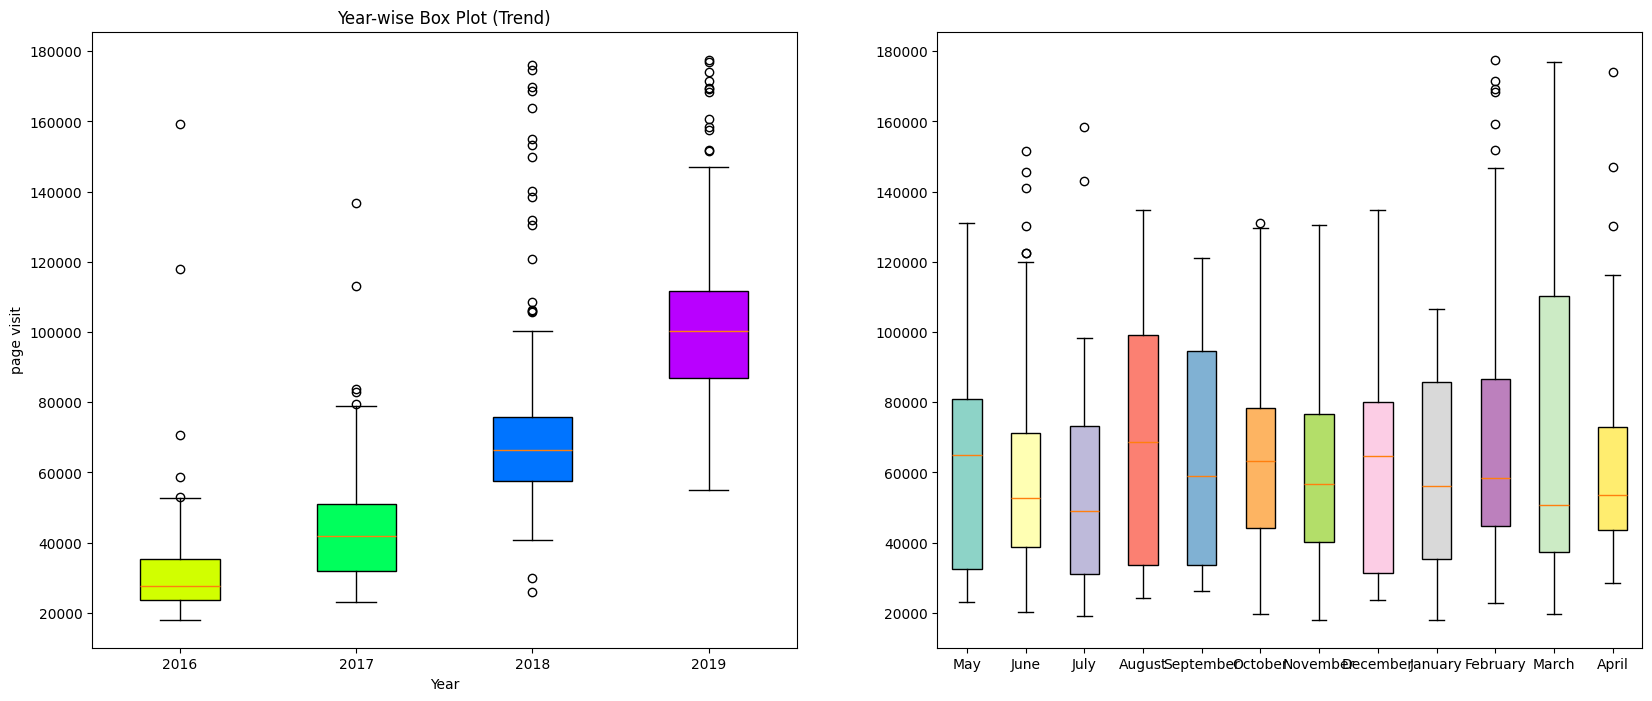

In [20]:
year_grouped = [group['value'].values for _, group in df.groupby('year')]
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(20,8))
#color palettes
year_palette = sns.color_palette("hsv", len(df['year'].unique()))
month_palette = sns.color_palette("Set3",12)
box1 = ax1.boxplot(
    year_grouped, 
    patch_artist=True, 
    tick_labels=df['year'].unique()
)
for patch , color in zip(box1['boxes'], year_palette):
    patch.set_facecolor(color)

#customise the plot 
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel("Year") 
ax1.set_ylabel("page visit")
#grouping by months
month_grouped = [group['value'].values for _, group in df.groupby('months')]
box2 = ax2.boxplot(
    month_grouped,
    patch_artist= True,
    tick_labels=df['months'].unique()
)
for patch , color in zip(box2['boxes'], month_palette):
    patch.set_facecolor(color)